In [15]:
%matplotlib inline

# 592B, Class 3.2 (09/19). Square waves, resampling adventures

You can get `librosa` by following the instructions at the [librosa github site](https://github.com/librosa/librosa). Follow the instructions for Anaconda. You should also take a look at the [demo jupyter notebook](http://nbviewer.jupyter.org/github/librosa/librosa/blob/master/examples/LibROSA%20demo.ipynb). Note for example, that by default, when audio files are read in they are remixed to mono and resampled to 22050 Hz.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile 
import scipy.signal as signal
import librosa #new!

from ipywidgets import interactive
from IPython.display import Audio, display

## Review questions

### Define a square wave function

Define a square wave function $f(t)$ with a period of $T=0.5s$, with a range of [0,2], with a value of 0 at $x=0$.

(1a) Do this using [`scipy.signal.square`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.square.html).

To help understand `scipy.signal.square`, first let's look at the examples from `help` for `scipy.signal.square` and try out the first one--just copy and paste the code in.

In [2]:
help(signal.square) 

Help on function square in module scipy.signal.waveforms:

square(t, duty=0.5)
    Return a periodic square-wave waveform.
    
    The square wave has a period ``2*pi``, has value +1 from 0 to
    ``2*pi*duty`` and -1 from ``2*pi*duty`` to ``2*pi``. `duty` must be in
    the interval [0,1].
    
    Note that this is not band-limited.  It produces an infinite number
    of harmonics, which are aliased back and forth across the frequency
    spectrum.
    
    Parameters
    ----------
    t : array_like
        The input time array.
    duty : array_like, optional
        Duty cycle.  Default is 0.5 (50% duty cycle).
        If an array, causes wave shape to change over time, and must be the
        same length as t.
    
    Returns
    -------
    y : ndarray
        Output array containing the square waveform.
    
    Examples
    --------
    A 5 Hz waveform sampled at 500 Hz for 1 second:
    
    >>> from scipy import signal
    >>> import matplotlib.pyplot as plt
    >>> t = n

Here's the first example:

> A 5 Hz waveform sampled at 500 Hz for 1 second:


```python
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(0, 1, 500, endpoint=False)
plt.plot(t, signal.square(2 * np.pi * 5 * t))
plt.ylim(-2, 2)
```

Let's try it:

(-1, 3)

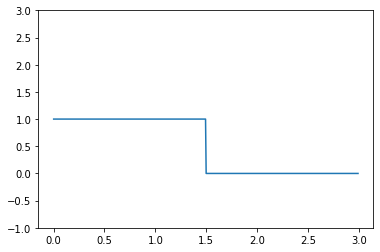

In [53]:
t = np.linspace(0, 3, 500, endpoint=False)
#plt.plot(t, signal.square(2 * np.pi * 5 * t))
#plt.plot(t, signal.square(t))
# Plot a square wave with a period of 1s (1Hz)

#plt.plot(t, signal.square(2 * np.pi * 1 * t))

# Plot a square wave with a period of 3s, (1/3 Hz)
plt.plot(t, 0.5 + 0.5 * signal.square(2 * np.pi * 1/3 * t))
plt.ylim(-1, 3)

Note that this function `signal.square(2 * np.pi * 5 * t)` has an f0 of 5Hz, a period of 1/5 s, and a range of [-1,1]. 

(1b) Define the same function using a conditional `if`...`else` structure, and Python's [*modulus* operator](https://docs.python.org/2/reference/expressions.html#binary-arithmetic-operations), `%`. 

Here's an example to get you started, for `scipy.signal.square` with a range of [-1,1], $T=2$, and $f(0)=1$. First let's plot what this looks like.

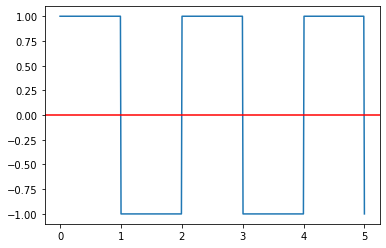

In [4]:
t = np.linspace(0, 5, 500)
plt.plot(t, signal.square(2*np.pi*0.5*t))
plt.axhline(y=0, color='r', linestyle='-') # Show x-axis

To define this "by hand", I need to say something like: 
> From 0 to $\pi$, $f(t)=1$. From $\pi$ to $2\pi$, $f(t) = -1$. And so on, for a period of $T=2\pi$. 

In other words, 
- if $t/2$ has a remainder < 1, then $f(t)=1$. 
- Otherwise, $f(t)=-1$.   

We can implement this as follows:

1
1
-1
-1
1


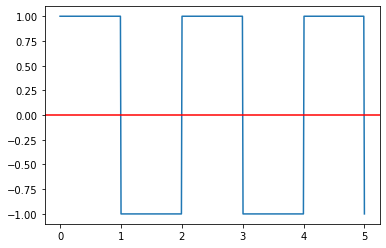

In [5]:
def my_square(x): # define your own square function!
    if (x % 2 < 1): # if x/2 has a remainder < 1
        y = 1 # then return y=1
    else:
        y = -1 # else, return y=-1
    return(y)

# Spot checks, compare to what we expect
print(my_square(2))
print(my_square(2.5))
print(my_square(3))
print(my_square(3.5))
print(my_square(4))

# Now let's try using a list comprehension over a vector of t-values
ts = np.linspace(0, 5, 500)
plt.plot(t, [my_square(t) for t in ts])
plt.axhline(y=0, color='r', linestyle='-') # Show x-axis    

***Now you try, for a square wave function f(t) with a period of $T=3s$, a range of [0,2], and a value of 0 at $x=0$.***

### Resampling adventures

For some further reading on resampling audio in Python, check out [Joachim Thiemann's blog post](https://signalsprocessed.blogspot.com/2017/05/resampling-in-python-electric-bugaloo.html). This is from 2017, so it may be a little outdated, but it's still interesting.

First, let's read in the WAV file and print the sampling rate `fs` and the number of samples in the signal, `len(data)`.

In [6]:
fs, data = wavfile.read('hmong_m6_24_c.wav')
ns = len(data) # number of samples
print("The sampling rate is", fs, "Hz.")
print("The number of samples is", ns, "samples.")

The sampling rate is 22050 Hz.
The number of samples is 35015 samples.


***In-class exercise: What is the duration of the audio file? Define `t_start` = 0, and `t_stop` as the total duration you compute.***

In [7]:
t_start = 0
t_stop = ns/fs
print(t_stop)

1.587981859410431


Here's an example reading in an audio file with `librosa.load` and resampling with librosa `librosa.core.resample`. The original WAV file in this case is already sampled at 22050 Hz. We re-sample to 8000 Hz and 2000 Hz. 

***In-class exercise: Play around with different rates for resampling. At what sampling rate do you start hearing a difference between the resampled audio and the original? What kind of difference do you hear as the sampling rate drops?***

In [11]:
y, sr = librosa.load("hmong_m6_24_c.wav")
print(type(y)) # Note that it is a numpy array
print("The sampling rate is: ", sr, "Hz")


y_8k = librosa.resample(y, sr, 8000)
y_2k = librosa.resample(y, sr, 2000)
y_500 = librosa.resample(y, sr, 500)

display(Audio(data=y,rate = sr))
display(Audio(data=y_8k,rate = 8000))
display(Audio(data=y_2k,rate = 2000))
display(Audio(data=y_500,rate = 500))

<class 'numpy.ndarray'>
The sampling rate is:  22050 Hz


***In-class exercise: What if the WAV file had been sampled at 44.kHz and you didn't want it to be resampled when read into python? How would you do that? How does the resampling algorithm used by librosa compared to that used by scipy.signal?***

Now let's try resampling from $f_s=22.05\,kHz$ to $f_{s,new} = 11\,kHz$. 
To do that, we need to specify a new number of samples for the resampled signal, $ns_{new}$. 
Note that the ratio by which we "downsample", $22.05/11$, is the ratio by which the number of samples increases. That is:

\begin{equation}
\frac{ns_{new}}{ns} = \frac{f_{s}}{f_{s,new}}
\end{equation}

and therefore,

\begin{equation}
ns_{new} = \frac{f_{s}}{f_{s,new}} \cdot ns
\end{equation}
So we can resample as follows:

In [18]:
fs_new = 6000

y_new = librosa.resample(y, sr, fs_new)
print("The number of samples in the re-sampled signal is", len(y_new), "samples.")

#Note that `signal.resample` can also take an additional argument,
#the original vector of sampled timepoints, and then return
#the new vector of sampled timepoints for the resampled signal.

The number of samples in the re-sampled signal is 9528 samples.


Now let's try plotting the two signals for comparison, adapting from the help example code.

Text(0, 0.5, 'Amplitude')

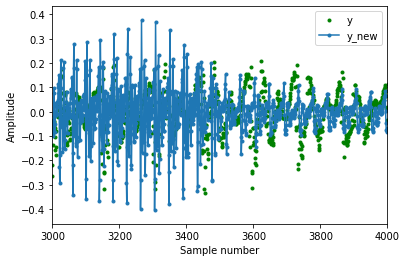

In [19]:
plt.plot(y,'g.', y_new, '.-')
plt.xlim(3000,4000)
plt.legend(['y', 'y_new'], loc='best')
plt.xlabel("Sample number")
plt.ylabel("Amplitude")

***In-class exercise. Examine this plot and comment on it. Then, plot with time in seconds on the x-axis rather than number of samples.***

9528
9528


Text(0, 0.5, 'Amplitude')

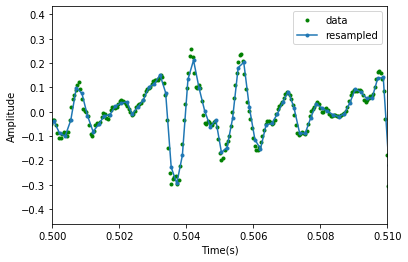

In [20]:
ns_new = int(np.floor((t_stop - t_start) * fs_new + 1))

print(ns_new)
print(len(y_new))

x = np.linspace(t_start, t_stop, ns)
x_new = np.linspace(t_start, t_stop, ns_new)

plt.plot(x, y,'g.', x_new, y_new,'.-')
plt.xlim(0.5,0.51)
plt.legend(['data', 'resampled'], loc='best')
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")


OK, now let's try listening to this.

In [21]:
display(Audio(data=y_new,rate = fs_new))

***In-class exercise: suppose you sample at a sampling rate of 4.5 Hz. Overlay the stem plot with the original signal for this sampling rate (like the previous plots).***


## The sampling theorem

The minimal sampling rate that can be used to reconstruct a signal from its samples is two times the frequency of the highest frequency component $\nu_{max}$ in the signal:

   sampling rate $> 2\nu_{max}$

The frequency 2$\nu_{max}$ is often called the **Nyquist frequency**.

***In-class exercise: What is the Nyquist frequency for $y(t)$ below?***

$$y(t) = \cos \left(\frac{9\pi}{2}t\right ) $$


So for a complex wave (a sum of sinusoids), increasing the frequency of the highest frequency component $\nu_{max}$ drives up the required sampling rate for reconstruction. Sometimes there is no highest frequency, e.g., in an infinite series like for a square wave.

Here's a intuitive example to play with. Plot a signal composed of a low frequency sinusoid and a high frequency sinusoid. As the gap in frequencies between the two frequency components increases, the resulting complex wave looks closer and closer to the lower frequency component, with lots of squigglies up and down at the frequency of the higher frequency component.


In [52]:
def plot_play_summed_sines(f1 = 440, f2 = 880, t_start = 0, t_stop = 2, fs = 44100, xlim_max = 0.01):
    x = np.linspace(t_start, t_stop, fs * (t_stop - t_start))
    y1 = np.sin(2*np.pi*f1*x)
    y2 = np.sin(2*np.pi*f2*x)
    
    plt.xlim(t_start,xlim_max)
    plt.plot(x , y1, "-g", label="y1") 
    plt.plot(x , y2, "-b", label="y2") 
    plt.plot(x , y1 + y2, "-r", label="y1+y2") 
    plt.legend(loc="upper right") 
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (dB)')
    plt.title("Adding up sines") 
    
    display(Audio(data=y1, rate=fs))
    display(Audio(data=y2, rate=fs))
    display(Audio(data=y1+y2, rate=fs))
    
v = interactive(plot_play_summed_sines, f1=(50,200), f2=(1000,5000), t_start = (0,0), t_stop = (0,5), xlim_max = (0.01,0.5))
display(v)    

interactive(children=(IntSlider(value=200, description='f1', max=200, min=50), IntSlider(value=1000, descripti…

If we **undersample**, we get **aliasing**: two functions may be indistinguishable based on our sampling, and we may recover a lower frequency alias of the actual signal. We can also have [visual aliasing](http://danielwalsh.tumblr.com/post/54400376441/playing-detective-with-rolling-shutter-photos).